In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import time
%matplotlib inline

#importing original dataset
data_orig = np.loadtxt('a2_data/data_banknote_authentication.txt', delimiter=',')

In [2]:
#Dataset : 

print("Dataset : \n\n"+ str(data_orig))
print("\nDimensions of dataset : "+str(data_orig.shape))

Dataset : 

[[  3.6216    8.6661   -2.8073   -0.44699   0.     ]
 [  4.5459    8.1674   -2.4586   -1.4621    0.     ]
 [  3.866    -2.6383    1.9242    0.10645   0.     ]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771    1.     ]
 [ -3.5637   -8.3827   12.393    -1.2823    1.     ]
 [ -2.5419   -0.65804   2.6842    1.1952    1.     ]]

Dimensions of dataset : (1372, 5)


In [3]:
#Seed for np.random
seed=3
np.random.seed(seed)    

In [4]:
#Shuffling imported original dataset
np.random.shuffle(data_orig)  

In [5]:
#Shuffled dataset
print("Shuffled dataset with (Seed "+str(seed) +") :\n\n"+str(data_orig))

Shuffled dataset with (Seed 3) :

[[-0.62043  0.5587  -0.38587 -0.66423  1.     ]
 [ 4.7965   6.9859  -1.9967  -0.35001  0.     ]
 [ 4.0422  -4.391    4.7466   1.137    0.     ]
 ...
 [-1.9555   0.20692  1.2473  -0.3707   1.     ]
 [-1.2846   3.2715  -1.7671  -3.2608   1.     ]
 [-2.3675  -0.43663  1.692   -0.43018  1.     ]]


In [6]:
#Extacting Y
y_orig = data_orig[:,-1]
print("Output Y   :"+str(y_orig))
print("Shape of Y : "+str(y_orig.shape))
print("Number of 0s : "+str(y_orig.shape[0]-np.sum(y_orig)))
print("Number of 1s : "+str(np.sum(y_orig)))

Output Y   :[1. 0. 0. ... 1. 1. 1.]
Shape of Y : (1372,)
Number of 0s : 762.0
Number of 1s : 610.0


In [7]:
#Getting rid of Rank 1 array
Y = np.reshape(y_orig,(y_orig.shape[0],1)).T    
print("Shape of Y: "+ str(Y.shape))

Shape of Y: (1, 1372)


In [8]:
#Extracting vectorized input feature X (transposed)
x_shuffled = data_orig[:,(0,1,2,3)].T
print("Input set : \n\n" +str(x_shuffled))

Input set : 

[[-0.62043  4.7965   4.0422  ... -1.9555  -1.2846  -2.3675 ]
 [ 0.5587   6.9859  -4.391   ...  0.20692  3.2715  -0.43663]
 [-0.38587 -1.9967   4.7466  ...  1.2473  -1.7671   1.692  ]
 [-0.66423 -0.35001  1.137   ... -0.3707  -3.2608  -0.43018]]


In [9]:
print(x_shuffled.shape)

(4, 1372)


In [10]:
def standardize(x):
    
    x_mean = np.mean(x,axis=1, keepdims=True)
    x_std = np.std(x, axis=1, keepdims=True)

    X = (x - x_mean)  #Python Broadcasting
    X = X/x_std
    
    return X

In [11]:
#Standardizing shuffled input X
X = standardize(x_shuffled)
#X = x_shuffled
print("Standardizd Input X : \n\n"+str(X))
print("\nMeans of features              : \n"+str(np.mean(X,axis=1,keepdims=True)))
print("\nStandard Deviation of features : \n"+str(np.std(X,axis=1,keepdims=True)))

Standardizd Input X : 

[[-0.37095945  1.53525151  1.26981427 ... -0.84076893 -0.60468005
  -0.98575122]
 [-0.23243133  0.86306915 -1.07609556 ... -0.29239137  0.22995878
  -0.40208289]
 [-0.41395243 -0.78782856  0.77730177 ... -0.03489116 -0.73453804
   0.0683244 ]
 [ 0.25112591  0.40073686  1.10875348 ...  0.39088564 -0.98519039
   0.36256517]]

Means of features              : 
[[-1.68313695e-17]
 [-7.50938022e-17]
 [ 5.17888291e-18]
 [-5.04941084e-17]]

Standard Deviation of features : 
[[1.]
 [1.]
 [1.]
 [1.]]


Distribution feature 1 :


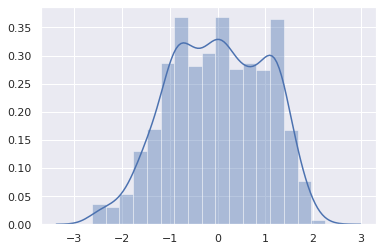

In [12]:
#Visualization
import seaborn as sns
sns.set(color_codes=True)
print("Distribution feature 1 :")
#sns.distplot(x_shuffled[0,:]);
sns.distplot(X[0,:])

In [13]:
#Splitting into Train, Test sets ( with a fixed seed )
train_split_percent = 80
test_split_percent = 20

train_X , test_X = X[:, : int( (train_split_percent/100)*X.shape[1])] , X[:,int( (train_split_percent/100)*X.shape[1]) : ]
train_Y , test_Y = Y[:, : int( (train_split_percent/100)*X.shape[1])] , Y[:,int( (train_split_percent/100)*X.shape[1]) : ]
print("Seed of Randomization   : "+str(seed))
print("\nShape of Training set X : "+str(train_X.shape))
print("Shape of Training set Y : "+str(train_Y.shape))
print("\nShape of Test set   X   : "+str(test_X.shape))
print("Shape of Test set Y     : "+str(test_Y.shape))

Seed of Randomization   : 3

Shape of Training set X : (4, 1097)
Shape of Training set Y : (1, 1097)

Shape of Test set   X   : (4, 275)
Shape of Test set Y     : (1, 275)


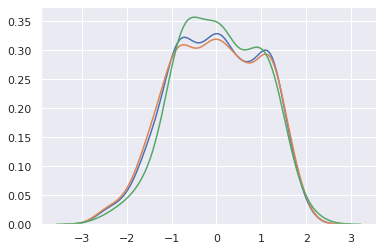

In [14]:
sns.distplot(X[0,:],hist=False)
sns.distplot(train_X[0,:],hist=False)
sns.distplot(test_X[0,:],hist=False)

In [15]:
m_train = train_X.shape[1]   #no. of training examples
m_test  = test_X.shape[1]    #no. of test examples
print("No of training examples : "+str(m_train))
print("No of test example      : "+str(m_test))

No of training examples : 1097
No of test example      : 275


In [16]:
#train_X = standardize(train_X)
print("Standardize train_X : "+str(train_X.shape)+"\n\n"+str(train_X))
print("\nMeans of features              : \n"+str(np.mean(train_X,axis=1,keepdims=True)))
print("\nStandard Deviation of features : \n"+str(np.std(train_X,axis=1,keepdims=True)))
#test_X  = standardize(test_X)
print("\n\nStandardize test_X : "+str(test_X.shape)+"\n\n"+str(test_X))

Standardize train_X : (4, 1097)

[[-0.37095945  1.53525151  1.26981427 ...  1.02915071 -1.64608924
   1.17511831]
 [-0.23243133  0.86306915 -1.07609556 ...  1.43761375 -2.55428489
   0.90080624]
 [-0.41395243 -0.78782856  0.77730177 ... -1.19015337  3.64723734
  -0.71464694]
 [ 0.25112591  0.40073686  1.10875348 ... -1.1938801  -0.76659709
   0.11628941]]

Means of features              : 
[[-0.01327993]
 [-0.00666567]
 [ 0.02132551]
 [-0.01137951]]

Standard Deviation of features : 
[[1.01564092]
 [1.01319481]
 [1.0175416 ]
 [1.00909945]]


Standardize test_X : (4, 275)

[[-0.3789933   0.20926179 -0.27940243 ... -0.84076893 -0.60468005
  -0.98575122]
 [ 0.09416322  1.33710083 -1.08598152 ... -0.29239137  0.22995878
  -0.40208289]
 [-1.00797687 -0.64206879  0.16457691 ... -0.03489116 -0.73453804
   0.0683244 ]
 [ 0.07811295 -0.28265408  1.01642149 ...  0.39088564 -0.98519039
   0.36256517]]


In [17]:
# Starting with our problem now

In [18]:
def sigmoid(Z):
    sigz= 1/(1+np.exp(-Z))
    sigz[sigz==1] = 0.999999999999
    sigz[sigz==0] = 0.000000000001
    return sigz    

In [19]:
#Initializing parameters
w, b = np.zeros(train_X.shape[1]), 0 
print("w : "+str(w))
print("b : "+str(b))

w : [0. 0. 0. ... 0. 0. 0.]
b : 0


In [20]:
def calculate(w,b,X,Y):
    m = X.shape[1]
   #Vectorized Implementation
    A = sigmoid(np.dot(w.T,X)+b)
    
    #Average of loss over m examples 
    cost = (-1/m)*np.sum(np.multiply(Y,np.log(A))+np.multiply(1-Y,np.log(1-A)))
    
    L2_cost = lambd2*(np.sum(np.square(w)))/(2*m)
    L1_cost = lambd1*(np.sum(np.abs(w)))/m
    cost = cost + L2_cost + L1_cost
    cost = np.squeeze(cost) 
    
    #Gradient
    w_temp=np.sign(w)
    
    l1_grad = (lambd1/m)*w_temp
    
    dw = (1/m)*np.dot(X,(A-Y).T) + (lambd2/m)*w  + l1_grad
    db = (1/m)*np.sum(A-Y)
    
    grads = { 'dw':dw, 'db':db}
    
    return cost, grads

In [21]:
def gradient_descent(w, b, X, Y, epochs, alpha, print_cost = False, print_after=100):
    
    costs = []
    for i in range(epochs):  
         
        alpha_decayed = alpha/(1+decay_rate*i)     
        cost, grads = calculate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']
        w = w-alpha_decayed*dw
        b = b-alpha_decayed*db
    
        if i%1 ==0:
            costs.append(cost)
        if print_cost and i % print_after == 0:
            print ("Cost after #epochs %i: %f" %(i, cost))
            
    parameters = {"w": w, "b": b}
    gradients = {"dw": dw, "db": db}
    
    return parameters, gradients, costs      
  

In [22]:
def predict(w, b, X):
    m= X.shape[1]
    Y_prediction = np.zeros((1,m))
    
    A=sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
          Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    return Y_prediction

In [23]:
def evaluate(Y,Yhat,Set):
    spos=0
    
    for i in range(Y.shape[1]): 
        if Y[0,i]==1 and Yhat[0,i]==1:
            spos = spos+1
            
    p = spos /np.sum(Yhat == 1)
    r = spos/ np.sum( Y == 1)
    acc = np.mean(Y == Yhat)
    f1score = 2*p*r/(p+r)
    
    data = [{'Precision': p, 'Recall': r, 'Accuracy': acc,'F-score': f1score}] 
    df = pd.DataFrame(data)
    
    print("\n"+Set+":")
    display(df)
    
    return

In [24]:
def model(train_X, train_Y, test_X, test_Y, epochs = 2000, learning_rate = 0.5, print_cost = False,print_after=100):

    w, b = np.zeros((4,1)),0
    tic = time.time()
    parameters, grads, costs = gradient_descent(w, b, train_X, train_Y, epochs, learning_rate, print_cost,print_after)
    

    w = parameters["w"]
    b = parameters["b"]
    

    test_Yhat = predict(w, b, test_X)
    train_Yhat = predict(w, b, train_X)
    
    toc= time.time()
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel("iterations (per "+str(print_after)+" )")
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    evaluate(test_Y,test_Yhat,"Test ")

    time_t = (toc-tic)*1000
    print("Time taken by the model : "+str((toc-tic))+" sec\n")
    
    return parameters

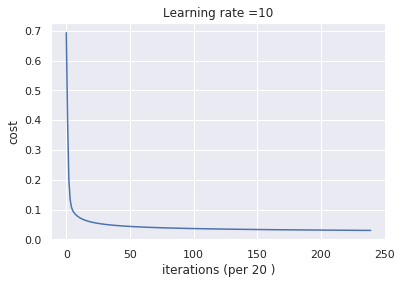


Test :


,Precision,Recall,Accuracy,F-score
0,0.992063,1.0,0.996364,0.996016


Time taken by the model : 0.03796052932739258 sec



In [25]:
lambd1 = 0
lambd2 = 0
decay_rate=0

parameters = model(train_X, train_Y, test_X,test_Y, 
                   epochs = 240, learning_rate =10, print_cost = False,print_after=20)